(render/code-cells)=
# Format code cells

Code cell rendering behaviour is controlled with configuration at a global, per-file, or per-cell level, as outlined in the [configuration section](config/intro).

See the sections below for a description of these configuration option and their effect.

(render/input/number)=
## Number source lines

You can control whether the number of source lines is displayed for code cells,
globally with `nb_number_source_lines = True`, per-file with `number_source_lines` in the notebook metadata, or per-cell with `number_source_lines` in the cell metadata.
For example:

````markdown
```{code-cell} ipython3
---
mystnb:
  number_source_lines: true
---
a = 1
b = 2
c = 1
```
````

In [1]:
a = 1
b = 2
c = 1

(render/output/stdout-stderr)=
## stdout and stderr outputs

(render/output/stderr)=
### Remove stdout or stderr

In some cases you may not wish to display stdout/stderr outputs in your final documentation,
for example, if they are only for debugging purposes.

You can tell MyST-NB to remove these outputs, per cell, using the `remove-stdout` and `remove-stderr` [cell tags](https://jupyter-notebook.readthedocs.io/en/stable/changelog.html#cell-tags), like so:

````md
```{code-cell} ipython3
:tags: [remove-input,remove-stdout,remove-stderr]

import pandas, sys
print("this is some stdout")
print("this is some stderr", file=sys.stderr)
# but what I really want to show is:
pandas.DataFrame({"column 1": [1, 2, 3]})
```
````

In [2]:
import pandas, sys
print("this is some stdout")
print("this is some stderr", file=sys.stderr)
# but what I really want to show is:
pandas.DataFrame({"column 1": [1, 2, 3]})

this is some stdout


this is some stderr


column 1
0         1
1         2
2         3

Alternatively, you can configure how stdout is dealt with at a global configuration level, using the `nb_output_stderr` configuration value.
This can be set to:

- `"show"` (default): show all stderr (unless a `remove-stderr` tag is present)
- `"remove"`: remove all stderr
- `"remove-warn"`: remove all stderr, but log a warning to sphinx if any found
- `"warn"`, `"error"` or `"severe"`: log to sphinx, at a certain level, if any found.

(render/output/group-stderr-stdout)=
### Group into single streams

Cells may print multiple things to `stdout` and `stderr`.
For example, if a cell prints status updates throughout its execution, each of these is often printed to `stdout`.
By default, these outputs may be split across multiple items, and will be rendered as separate "chunks" in your built documentation.

If you'd like each of the outputs in `stderr` and `stdout` to be merged into a single stream for each, use the following configuration:

```python
nb_merge_streams = True
```

This will ensure that all `stderr` and `stdout` outputs are merged into a single group.
This also makes cell outputs more deterministic.
Normally, slight differences in timing may result in different orders of `stderr` and `stdout` in the cell output, while this setting will sort them properly.

(render/output/priority)=
## Outputs MIME priority

When Jupyter executes a code cell it can produce multiple outputs, and each of these outputs can contain multiple [MIME media types](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types), for use by different output formats (like HTML or LaTeX).

MyST-NB stores a base priority dictionary for most of the common [Sphinx builder names](https://www.sphinx-doc.org/en/master/usage/builders/index.html),
mapping MIME types to a priority number (lower is higher priority):

In [3]:
import yaml
from myst_nb.core.render import base_render_priority
print(yaml.dump(base_render_priority()))

applehelp:
  application/javascript: 20
  application/vnd.jupyter.widget-view+json: 10
  image/gif: 50
  image/jp2: 80
  image/jpeg: 60
  image/png: 40
  image/svg+xml: 90
  image/tiff: 70
  text/html: 30
  text/latex: 110
  text/markdown: 100
  text/plain: 120
changes:
  text/latex: 10
  text/markdown: 20
  text/plain: 30
devhelp:
  application/javascript: 20
  application/vnd.jupyter.widget-view+json: 10
  image/gif: 50
  image/jpeg: 60
  image/png: 40
  text/html: 30
  text/latex: 80
  text/markdown: 70
  text/plain: 90
dirhtml:
  application/javascript: 20
  application/vnd.jupyter.widget-view+json: 10
  image/gif: 60
  image/jpeg: 70
  image/png: 50
  image/svg+xml: 40
  text/html: 30
  text/latex: 90
  text/markdown: 80
  text/plain: 100
dummy:
  text/latex: 10
  text/markdown: 20
  text/plain: 30
epub:
  application/javascript: 20
  application/vnd.jupyter.widget-view+json: 10
  image/gif: 60
  image/jpeg: 70
  image/png: 50
  image/svg+xml: 40
  text/html: 30
  text/latex: 90
 

Items in this dictionary can be overridden by the `nb_mime_priority_overrides` configuration option, in your `conf.py`.
For example, the following configuration applies in order:

- Sets `text/plain` as the highest priority for `html` output.
- Disables `image/jpeg` for `latex` output
- Adds a custom MIME type `customtype` for all builders (`*` applies to all builders)

```python
nb_mime_priority_overrides = [
  ('html', 'text/plain', 0),
  ('latex', 'image/jpeg', None),
  ('*', 'customtype', 20)
]
```

```{versionchanged} 0.14.0
`nb_mime_priority_overrides` replaces `nb_render_priority`
```

:::{seealso}
[](render/output/customise), for a more advanced means of customisation.
:::

(render/output/images)=
## Images and Figures

With the default renderer, for any image types output by the code, we can apply formatting *via* cell metadata.
The top-level metadata key can be set using `nb_cell_metadata_key` in your `conf.py`, and is set to `mystnb` by default.
Then for the image we can apply all the variables of the standard [image directive](https://docutils.sourceforge.io/docs/ref/rst/directives.html#image):

- **width**: length or percentage (%) of the current line width
- **height**: length
- **scale**: integer percentage (the "%" symbol is optional)
- **align**: "top", "middle", "bottom", "left", "center", or "right"
- **classes**: space separated strings
- **alt**: string

Units of length are: 'em', 'ex', 'px', 'in', 'cm', 'mm', 'pt', 'pc'

You can also wrap the output in a [`figure`](https://docutils.sourceforge.io/docs/ref/rst/directives.html#figure), that can include:

- **align**: "left", "center", or "right"
- **caption**: a string, which must contain a single paragraph and is rendered as MyST Markdown (subsequent paragraphs are added as a legend)
- **caption_before**: a boolean, if true, the caption is rendered before the figure (default is false)
- **name**: by which to reference the figure
- **classes**: space separated strings

````md
```{code-cell} ipython3
---
mystnb:
  image:
    width: 300px
    alt: fun-fish
    classes: shadow bg-primary
  figure:
    caption: |
      Hey everyone its **party** time!

      (and I'm a legend)
    name: fun-fish-ref
---
from IPython.display import Image
Image("images/fun-fish.png")
```
````

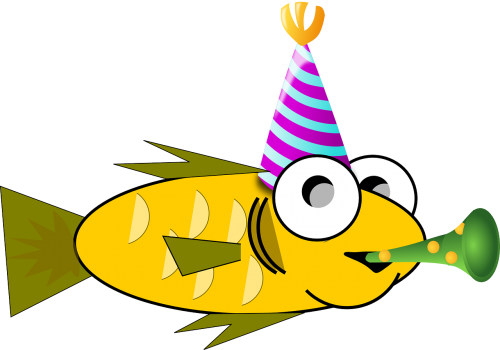

In [4]:
from IPython.display import Image
Image("images/fun-fish.png")

Now we can link to the image from anywhere in our documentation: [swim to the fish](fun-fish-ref)

You can create figures for any mime outputs, including tables:

````md
```{code-cell} ipython3
---
mystnb:
  figure:
    align: center
    caption_before: true
    caption: This is my table caption, above the table
---
import pandas
df = pandas.DataFrame({"column 1": [1, 2, 3]})
df = df.style.set_table_attributes('class="dataframe align-center"')
df
```
````

In [5]:
import pandas
df = pandas.DataFrame({"column 1": [1, 2, 3]})
df = df.style.set_table_attributes('class="dataframe align-center"')
df

(render/output/markdown)=
## Markdown

The format of output `text/markdown` can be specified by `render_markdown_format` configuration:

- `commonmark` (default): Restricted to the [CommonMark specification](https://commonmark.org/).
- `gfm`: Restricted to the [GitHub-flavored markdown](https://github.github.com/gfm/).
  - Note, this requires the installation of the [linkify-it-py package](https://pypi.org/project/linkify-it-py)
- `myst`: Uses [the MyST parser](https://myst-parser.readthedocs.io/en/latest/) with the same configuration as the current document.

CommonMark formatting will output basic Markdown syntax:

In [6]:
from IPython.display import display, Markdown
display(Markdown('**_some_ markdown** and an [a reference](https://example.com)!'))

**_some_ markdown** and an [a reference](https://example.com)!

and even internal images can be rendered!

In [7]:
display(Markdown('![figure](../_static/logo-wide.svg)'))

![figure](../_static/logo-wide.svg)

But setting the Markdown format to `myst` will allow for more advanced formatting,
such as including internal references, tables, and even other directives, either using:

- `myst_render_markdown_format = "myst"` in the `conf.py` to set globally, or
- `markdown_format` in the cell metadata to set per-cell.

`````md
````{code-cell} ipython3
---
mystnb:
  markdown_format: myst
---
display(Markdown('**_some_ markdown** and an [internal reference](render/output/markdown)!'))
display(Markdown("""
| a | b | c |
|---|---|---|
| 1 | 2 | 3 |
"""))
display(Markdown("""
```{note}
A note admonition!
```
"""))
````
`````

The parsed Markdown is integrated into the wider documentation, and so it is possible, for example, to include internal references:

In [8]:
display(Markdown('**_some_ markdown** and an [internal reference](render/output/markdown)!'))
display(Markdown("""
| a | b | c |
|---|---|---|
| 1 | 2 | 3 |
"""))
display(Markdown("""
```{note}
A note admonition!
```
"""))

**_some_ markdown** and an [internal reference](render/output/markdown)!


| a | b | c |
|---|---|---|
| 1 | 2 | 3 |



```{note}
A note admonition!
```


(render/output/ansi)=
## ANSI Outputs

By default, the standard output/error streams and text/plain MIME outputs may contain ANSI escape sequences to change the text and background colors.

In [9]:
import sys
print("BEWARE: \x1b[1;33;41mugly colors\x1b[m!", file=sys.stderr)
print("AB\x1b[43mCD\x1b[35mEF\x1b[1mGH\x1b[4mIJ\x1b[7m"
      "KL\x1b[49mMN\x1b[39mOP\x1b[22mQR\x1b[24mST\x1b[27mUV")

ABCDEFGHIJKLMNOPQRSTUV


BEWARE: ugly colors!


This uses the built-in {py:class}`~myst_nb.core.lexers.AnsiColorLexer` [pygments lexer](https://pygments.org/).
You can change the lexer used in the `conf.py`, for example to turn off lexing:

```python
nb_render_text_lexer = "none"
```

The following code[^acknowledge] shows the 8 basic ANSI colors it is based on.
Each of the 8 colors has an “intense” variation, which is used for bold text.

[^acknowledge]: Borrowed from [nbsphinx](https://nbsphinx.readthedocs.io/en/0.7.1/code-cells.html#ANSI-Colors)!

In [10]:
text = " XYZ "
formatstring = "\x1b[{}m" + text + "\x1b[m"

print(
    " " * 6
    + " " * len(text)
    + "".join("{:^{}}".format(bg, len(text)) for bg in range(40, 48))
)
for fg in range(30, 38):
    for bold in False, True:
        fg_code = ("1;" if bold else "") + str(fg)
        print(
            " {:>4} ".format(fg_code)
            + formatstring.format(fg_code)
            + "".join(
                formatstring.format(fg_code + ";" + str(bg)) for bg in range(40, 48)
            )
        )

            40   41   42   43   44   45   46   47  
   30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 


:::{note}
ANSI also supports a set of 256 indexed colors.
This is currently not supported, but we hope to introduce it at a later date
(raise an issue on the repository if you require it!).
:::

(render/output/customise)=
## Customise the render process

The render process is governed by subclasses of {py:class}`~myst_nb.core.render.NbElementRenderer`, which dictate how to create the `docutils` AST nodes for elements of the notebook.

Implementations are loaded *via* Python [entry points](https://packaging.python.org/guides/distributing-packages-using-setuptools/#entry-points), in the `myst_nb.renderers` group.
So it is possible to inject your own subclass to fully override rendering.

For example, the renderer loaded in this package is:

```toml
[project.entry-points."myst_nb.renderers"]
default = "myst_nb.core.render:NbElementRenderer"
```

You can then select the renderer plugin in your `conf.py`:

```python
nb_render_plugin = "default"
```

Plugins can also override rendering of particular output MIME types,
using the `myst_nb.mime_renderers` entry point group to supply functions with signature: {py:class}`~myst_nb.core.render.MimeRenderPlugin`.

For example {py:class}`myst_nb.core.render.ExampleMimeRenderPlugin`, is loaded in this package:

```toml
[project.entry-points."myst_nb.mime_renderers"]
example = "myst_nb.core.render:ExampleMimeRenderPlugin"
```

Meaning we can now render `custommimetype` in all output formats:

In [11]:
from IPython.display import display
display({"custommimetype": "Some text"}, raw=True)